In [ ]:
!pip install sklearn tensorflow

In [1]:
import numpy as np
import os
import constants as cs
import yaml
import globali as gg


In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm

In [3]:
def read_yaml_fields():
    with open(cs.YAMLFILE, 'r') as ff:
        content = yaml.safe_load(ff)
        a = set(content.get('actions', []))
        c = content.get('counter', {})
        return a, c


In [4]:
gg.actions, gg.counters = read_yaml_fields()

In [5]:
gg.actions

{'a',
 'b',
 'c',
 'cinque',
 'd',
 'due',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'nove',
 'otto',
 'quattro',
 'sei',
 'sette',
 'tre',
 'uno',
 'zero'}

In [6]:
gg.counters

{'a': 100,
 'b': 100,
 'c': 100,
 'cinque': 100,
 'd': 100,
 'due': 100,
 'e': 100,
 'f': 100,
 'g': 100,
 'h': 100,
 'i': 100,
 'j': 100,
 'k': 100,
 'l': 100,
 'm': 100,
 'nove': 100,
 'otto': 100,
 'quattro': 100,
 'sei': 100,
 'sette': 100,
 'tre': 100,
 'uno': 100,
 'zero': 100}

In [7]:
label_map = {label:num for num, label in enumerate(gg.actions)}

In [8]:
label_map

{'b': 0,
 'e': 1,
 'quattro': 2,
 'i': 3,
 'tre': 4,
 'zero': 5,
 'g': 6,
 'm': 7,
 'uno': 8,
 'sette': 9,
 'c': 10,
 'h': 11,
 'otto': 12,
 'nove': 13,
 'd': 14,
 'a': 15,
 'due': 16,
 'k': 17,
 'sei': 18,
 'l': 19,
 'j': 20,
 'f': 21,
 'cinque': 22}

In [9]:
sequences, labels = [], []

for action in tqdm(gg.actions, desc="Processing Actions"):
    for sequence in range(gg.counters[action]):
        window = []
        for frame_num in range(cs.NUM_FRAME):
            res = np.load(os.path.join(cs.KEYPOINTS_FOLDER, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


Processing Actions: 100%|██████████| 23/23 [01:24<00:00,  3.66s/it]


In [10]:
np.array(sequences).shape       # 15 videos, 30 frames, 1662 features

(2300, 30, 1662)

In [11]:
np.array(labels).shape

(2300,)

In [12]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [13]:
X = np.array(sequences)

In [14]:
X.shape

(2300, 30, 1662)

In [15]:
y = to_categorical(labels).astype(int)

In [16]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [18]:
y_test.shape

(115, 23)

### Build and Train LSTM Natural Network

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

In [20]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [21]:
np_actions = np.array(list(gg.actions))
print(np_actions.shape[0])
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30, 1662)))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(np_actions.shape[0], activation='softmax'))

23


In [22]:
np_actions = np.array(list(gg.actions))
print(np_actions.shape[0])
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(np_actions.shape[0], activation='softmax'))

5


In [22]:
res = [.7, 0.2, 0.1]

In [23]:
np_actions[np.argmax(res)]

'b'

In [24]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [25]:
early_stopping = EarlyStopping(monitor='loss', patience=100, restore_best_weights=True)

In [26]:
best_model_path = os.path.join(cs.MODELS_FOLDER, 'best_model.h5') 
checkpoint = ModelCheckpoint(best_model_path, monitor='loss', save_best_only=True)

In [27]:
history = model.fit(X_train, y_train, epochs=3000, callbacks=[early_stopping, checkpoint])    # , callbacks=[tb_callback]
# save best model
final_model_path = os.path.join(cs.MODELS_FOLDER, 'final_model.h5') 
model.save(final_model_path)

Epoch 1/3000
69/69 [==============================] - 28s 181ms/step - loss: 4.2419 - categorical_accuracy: 0.0426


C:\Users\Paolo\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/3000
69/69 [==============================] - 13s 185ms/step - loss: 3.9317 - categorical_accuracy: 0.0572
Epoch 3/3000
69/69 [==============================] - 12s 175ms/step - loss: 3.7065 - categorical_accuracy: 0.0723
Epoch 4/3000
69/69 [==============================] - 12s 168ms/step - loss: 3.5248 - categorical_accuracy: 0.0874
Epoch 5/3000
69/69 [==============================] - 12s 170ms/step - loss: 3.3696 - categorical_accuracy: 0.0906
Epoch 6/3000
69/69 [==============================] - 12s 176ms/step - loss: 3.2224 - categorical_accuracy: 0.1043
Epoch 7/3000
69/69 [==============================] - 13s 192ms/step - loss: 3.0962 - categorical_accuracy: 0.1162
Epoch 8/3000
69/69 [==============================] - 13s 187ms/step - loss: 2.9945 - categorical_accuracy: 0.1236
Epoch 9/3000
69/69 [==============================] - 13s 187ms/step - loss: 2.8920 - categorical_accuracy: 0.1263
Epoch 10/3000
69/69 [==============================] - 13s 186ms/step - loss: 2.

KeyboardInterrupt: 

In [ ]:
model.summary()

### Make Predictions

In [30]:
res = model.predict(X_test)

3/3 [==============================] - 2s 24ms/step


In [31]:
np_actions[np.argmax(res[4])]

'nove'

In [32]:
np_actions[np.argmax(y_test[4])]

'nove'

In [38]:
# model.load_weights('action.h5')

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'action.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

### Evaluation using Confusion Matrix and Accuracy

In [33]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 35ms/step


In [34]:
y_true = np.argmax(y_test, axis=1).tolist()
y_pred = np.argmax(y_pred, axis=1).tolist()


In [35]:
len(y_true)

75

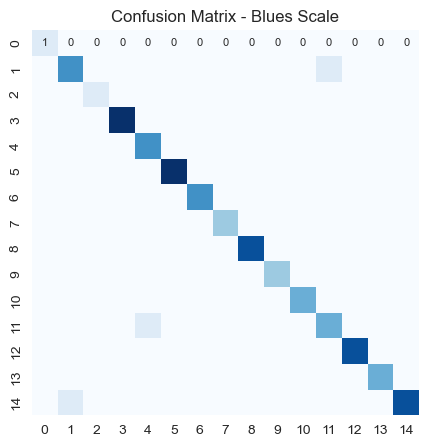

In [36]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()

# Plotting confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 8})
plt.title('Confusion Matrix - Blues Scale', fontsize=12)
plt.show()

In [38]:
accuracy_score(y_true, y_pred)

0.96